First, you must import the necessary libraries 

Requests: The requests library is used to make HTTP requests, which is especially useful for fetching data from APIs. It’s used for requests to interact with an API that provides tournaments, player, or statistical data.

Example usage:
response = requests.get("https://api.example.com/pga/tournament_data")
data = response.json()  # Parses the API response as JSON

Json: The json library is used to work with JSON data, which is the common format for API responses. Since many APIs, including sports data APIs, return data in JSON format, you’ll use json to parse and manipulate this data.

Example usage:
data = response.json()  # Directly parse JSON with `requests`
json_data = json.loads(response.text)  # Manually parse JSON

NaN from numpy: NaN (Not a Number) from the numpy library is useful for handling missing or undefined data.
In sports data, you might encounter missing values for certain players or events. You can set these values to NaN for easier handling during analysis or data cleaning.

Example usage:
data['score'] = data.get('score', NaN) # Use NaN for missing scores

Pandas:  Is a powerful library for data manipulation and analysis, and it’s essential for working with structured data in DataFrames. Pandas will allow you to organize API data in a tabular format, clean and transform it, and perform analysis.

Example usage:
df = pd.DataFrame(data['players'])  # Convert JSON data into a DataFrame
df.fillna(NaN, inplace=True)        # Handle missing data
df.to_sql("tournament_results", con=engine)  # Save to SQL

Recap 
requests: Fetch data from APIs.
json: Parse JSON data from API responses.
NaN from numpy: Handle missing data in a consistent way.
pandas: Organize, clean, and analyze data in DataFrames.
Using these libraries, you’ll be able to fetch, structure, and analyze PGA data efficiently in your project!


In [1]:
pip install --upgrade numpy pandas

In [18]:
import requests
import json
import numpy as Nan
import pandas as pd

The below code sends an introspection query to a GraphQL API for the PGA Tour's data service. It starts by defining the API endpoint URL (url) and the API key (X_API_KEY) needed for authentication. An introspection query is then defined, which is a special GraphQL query used to retrieve information about the GraphQL schema, such as the types of operations supported (queries, mutations, subscriptions). The query is sent to the API endpoint via a POST request using the requests library, with the query and API key included in the request header.

If the request is successful (HTTP status code 200), the response is processed and printed in a formatted JSON structure to display the schema data. If the request fails, an error message with the status code is printed.

Introspection Query: Is a query that allows you to request information about the GraphQL schema itself, including the available types, fields, and operations (queries, mutations, subscriptions). By using introspection, you can dynamically explore the schema and understand how to structure queries, ensuring you access the data and operations you need.

In [19]:
# Define the URL and API key
url = "https://orchestrator.pgatour.com/graphql"
X_API_KEY = "da2-gsrx5bibzbb4njvhl7t37wqyl4"


# Define the introspection query
introspection_query = """
{
    __schema {
        queryType { name }
        mutationType { name }
        subscriptionType { name }
    }
}
"""

# Send the introspection query
response = requests.post(url, json={"query": introspection_query}, headers={"x-api-key": X_API_KEY})

# Display the result
if response.status_code == 200:
    schema_data = response.json()
    print(json.dumps(schema_data, indent=2))
else:
    print("Error:", response.status_code)

{
  "data": {
    "__schema": {
      "queryType": {
        "name": "Query"
      },
      "mutationType": {
        "name": "Mutation"
      },
      "subscriptionType": {
        "name": "Subscription"
      }
    }
  }
}


This code sends an introspection query to a GraphQL API to retrieve detailed information about the "Query" type in the schema. The query specifically requests the name, description, arguments, and return type for each field under the "Query" type, including information about their respective data types.

The response, if successful (HTTP status code 200), is processed and printed in a formatted JSON structure to display the detailed schema information. If the request fails, an error message with the status code is printed.

The "Query" type is crucial in this project because it defines the available operations for retrieving data from the GraphQL API, such as fetching statistics or other relevant information. Understanding the "Query" type allows you to structure requests effectively and ensure you're accessing the correct data for your analysis and machine learning tasks.

Note: Additionally, flattening and converting the results to Excel makes the data much easier to read and analyze, facilitating better insight extraction.(Seen in a later code chunk)

In [20]:
introspection_query = """
{
    __type(name: "Query") {
        name
        fields {
            name
            description
            args {
                name
                description
                type {
                    name
                    kind
                    ofType {
                        name
                        kind
                    }
                }
            }
            type {
                name
                kind
                ofType {
                    name
                    kind
                }
            }
        }
    }
}
"""

# Send the request
response = requests.post(url, json={"query": introspection_query}, headers={"x-api-key": X_API_KEY})

# Display the result
if response.status_code == 200:
    query_data = response.json()
    print(json.dumps(query_data, indent=2))
else:
    print("Error:", response.status_code)

{
  "data": {
    "__type": {
      "name": "Query",
      "fields": [
        {
          "name": "liveVideoOverride",
          "description": null,
          "args": [
            {
              "name": "tourCode",
              "description": null,
              "type": {
                "name": null,
                "kind": "NON_NULL",
                "ofType": {
                  "name": "TourCode",
                  "kind": "ENUM"
                }
              }
            },
            {
              "name": "tournamentId",
              "description": null,
              "type": {
                "name": null,
                "kind": "NON_NULL",
                "ofType": {
                  "name": "String",
                  "kind": "SCALAR"
                }
              }
            }
          ],
          "type": {
            "name": null,
            "kind": "NON_NULL",
            "ofType": {
              "name": "LiveVideoOverride",
              "kind": "OBJ

THis is a carry over from previous with the addition of, it then processes the response, extracting field details such as field names, descriptions, argument types, and their respective data types, and organizes the results into a structured DataFrame.

Once the data is organized, it is saved to an Excel file for easy readability and analysis. Flattening and saving the data in this format allows for better manipulation and insight extraction, making it much easier to analyze and visualize the GraphQL schema in a more accessible format. If the request fails, an error message with the status code and details is printed.

In [21]:
# Define the GraphQL introspection query
introspection_query = """
{
    __type(name: "Query") {
        name
        fields {
            name
            description
            args {
                name
                description
                type {
                    name
                    kind
                    ofType {
                        name
                        kind
                        ofType {
                            name
                            kind
                        }
                    }
                }
            }
            type {
                name
                kind
                ofType {
                    name
                    kind
                }
            }
        }
    }
}
"""

# Send the request
response = requests.post(url, json={"query": introspection_query}, headers={"x-api-key": X_API_KEY})

# Check if the request was successful
if response.status_code == 200:
    query_data = response.json()

    # Extracting the fields from the response
    fields = query_data.get("data", {}).get("__type", {}).get("fields", [])

    # Create list to hold rows for DataFrame
    rows = []
    for field in fields:
        # Outer type information
        outer_type_name = field.get("type", {}).get("name")
        outer_type_kind = field.get("type", {}).get("kind")

        for arg in field.get("args", []):
            # Inner type information
            arg_type = arg.get("type", {})
            inner_type_name = arg_type.get("name")
            inner_type_kind = arg_type.get("kind")

            # Initialize inner_of_type
            inner_of_type_name = None
            inner_of_type_kind = None

            # Check if ofType exists and is not None
            if 'ofType' in arg_type and arg_type['ofType'] is not None:
                inner_of_type = arg_type['ofType']
                inner_of_type_name = inner_of_type.get("name")
                inner_of_type_kind = inner_of_type.get("kind")

            row = {
                "Field Name": field.get("name"),
                "Field Description": field.get("description"),
                "Outer Type Name": outer_type_name,
                "Outer Type Kind": outer_type_kind,
                "Arg Name": arg.get("name"),
                "Arg Description": arg.get("description"),
                "Arg Type": inner_type_name,
                "Arg Kind": inner_type_kind,
                "Inner Type Name": inner_of_type_name,
                "Inner Type Kind": inner_of_type_kind
            }
            rows.append(row)

    # Create DataFrame from rows
    df = pd.DataFrame(rows)

    # Save DataFrame to Excel
    excel_path = r"C:\Users\Sloan\Desktop\graphql_introspectionv3.xlsx"
    df.to_excel(excel_path, index=False)

    # Display the DataFrame
    print(df.head())
else:
    print("Error:", response.status_code, response.text)

ModuleNotFoundError: No module named 'openpyxl'

Over the next couple of code chunks I am doing some quick internal checks.

1. I am checking my current working directory which is displayed as C:\Users\Sloan\Documents\Github\Sloan-Sports-ML-
2. I am looking for the files that are saved under this directory, to ensure I am uploading an image that I can actually interact with 

In [22]:
import os
print(os.getcwd())

c:\Users\Sloan\Documents\Github\Sloan-Sports-ML-


In [23]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'docker-setup',
 'PGAArch.drawio',
 'PGAWebsite .png',
 'PGA_Data.ipynb',
 'README.md',
 'Untitled.ipynb']

This code snippet loads and displays an image (PGAWebsite .png) from a specified file path using the matplotlib library. The image is shown in a larger figure size, specifically with dimensions of 20 inches in width and 16 inches in height, to enhance visibility. The axes are hidden for a cleaner presentation, and the imshow function is used to render the image on the plot. The image is displayed using plt.show(), making it visible in the output.

Matplotlib is building the font cache; this may take a moment.


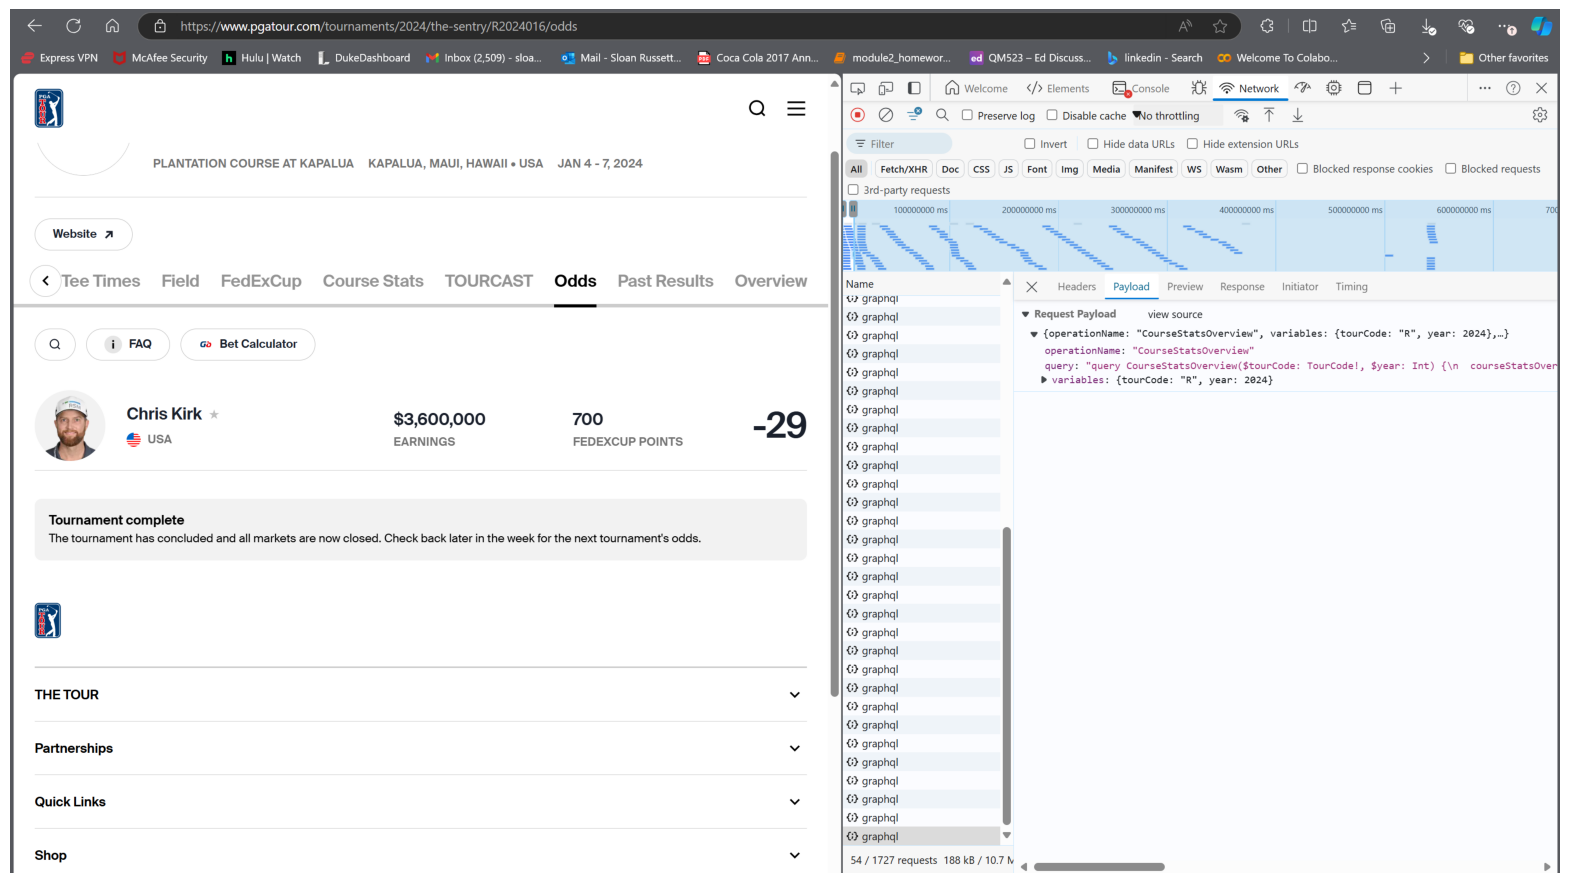

In [13]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Use the filename with the extra space
img = mpimg.imread(r'C:\Users\Sloan\Documents\Github\Sloan-Sports-ML-\PGAWebsite .png')

# Create a larger figure (you can adjust the size as needed)
plt.figure(figsize=(20, 16))  # Set the figure size (width, height)
plt.imshow(img)
plt.axis('off')  # Hide axes for a cleaner view
plt.show()


Leveraging DevTools
To get started, you can follow the instructions in this guide on how to open DevTools in Microsoft Edge (the same approach can be applied to other browsers):https://learn.microsoft.com/en-us/microsoft-edge/devtools-guide-chromium/overview#open-devtools.

Once DevTools is open, you will need to work with both the website interface and DevTools simultaneously. As you navigate the website, you'll encounter instances where GraphQL calls are triggered. At these points, you can switch to the "Payload" tab in DevTools to view the exact contents of a successful query. This is also how I mapped individual stat IDs and tournament IDs that will be used later in the process. While manually mapping these IDs might seem tedious, this approach provided valuable insights and hands-on experience throughout the development. Additionally, it significantly improved the efficiency of data fetching by leveraging loops to automate repetitive tasks.

The next two code snippets where derived from Charlie Ahmans PGA Repo. Charlie deserves a lot of credit for the work being done here because it inspired my ideas to take this further.

The first code snippet is a list of the stat codes on some of the most prevalant golf stats in the game, using dev tools and PGA site he extracted the code associated with the stats he needed. 

The second code snippet are the functions for the graphql queries necessary to fetch the stats. Further down the snippet,he creates a loop to pass the function through based on the years dataframe that he also created. The json return is flattened and now shows a clean tabular display. Charlie was on it 

In [24]:
# Stat IDs and Stat Description used for queries
# This will be the features in final data set
stats = {
    "120": "ScoringAvg",
    "156": "BirdieAvg",
    "101": "DrivingDistance",
    "129": "TotalDriving",
    "103": "GIR%",
    "130": "Scrambling",
    "02675": "SG_Total",
    "02568": "SG_ApproachGreen",
    "02564": "SG_Putting",
    "02567": "SG_OffTee",
    "02569": "SG_AroundGreen",
    "02674": "SG_TeeToGreen",
    "02394": "FedExCupPoints",
    "138": "Top10Finishes",
    "186": "WorldRank",
    "109": "Money"
}

In [27]:

# some functions containing queries used to extract data from PGATour.com
# Data Structures varied, therefore multiple functions/queries were needed

def get_df(YEAR, STAT_ID, DESCR):
    X_API_KEY = "da2-gsrx5bibzbb4njvhl7t37wqyl4"
    req = {
        "operationName": "StatDetails",
        "variables": {
            "tourCode": "R",
            "statId": STAT_ID,
            "year": YEAR,
            "eventQuery": None,
        },
        "query": """query StatDetails($tourCode: TourCode!, $statId: String!, $year: Int, $eventQuery: StatDetailEventQuery) {
  statDetails(
    tourCode: $tourCode
    statId: $statId
    year: $year
    eventQuery: $eventQuery
  ) {
    tourCode
    year
    displaySeason
    statId
    statType
    tournamentPills {
      tournamentId
      displayName
    }
    yearPills {
      year
      displaySeason
    }
    statTitle
    statDescription
    tourAvg
    lastProcessed
    statHeaders
    statCategories {
      category
      displayName
      subCategories {
        displayName
        stats {
          statId
          statTitle
        }
      }
    }
    rows {
      ... on StatDetailsPlayer {
        __typename
        playerId
        playerName
        country
        countryFlag
        rank
        rankDiff
        rankChangeTendency
        stats {
          statName
          statValue
          color
        }
      }
      ... on StatDetailTourAvg {
        __typename
        displayName
        value
      }
    }
    sponsorLogo
    }
    } 
    """,
    }

    # post the request
    page = requests.post(
        url,
        json=req,
        headers={"x-api-key": X_API_KEY},
    )
    # get the data
    data = page.json()["data"]["statDetails"]["rows"]

    # filter out items, thats __typename is not "StatDetailsPlayer" like
    # data contains -> "__typename": "StatDetailTourAvg", remove the tour average value
    data = filter(lambda item: item.get("__typename", Nan) == "StatDetailsPlayer", data)

    # format to a table that is in the webpage
    
    table = map(
        lambda item: {
            # "RANK": item["rank"],
            "PID" : item["playerId"],
            "PLAYER": item["playerName"],
            DESCR: item["stats"][0]["statValue"],
        },
        data,
    )

    # convert the dataframe
    s = pd.DataFrame(table)

    return s

def get_players():
    url = "https://orchestrator.pgatour.com/graphql"

    X_API_KEY = "da2-gsrx5bibzbb4njvhl7t37wqyl4"
    req = {
    "operationName": "PlayerDirectory",
    "variables": {
        "tourCode": "R"
    },
    "query": """query PlayerDirectory($tourCode: TourCode!, $active: Boolean) {  playerDirectory(tourCode: $tourCode, active: $active) {    tourCode    players {      id      isActive      firstName      lastName      shortName      displayName      alphaSort      country      countryFlag      headshot      playerBio {        id        age        education        turnedPro      }    }  }}
    """,
    }

    # post the request
    page = requests.post(
    url,
    json=req,
    headers={"x-api-key": X_API_KEY},
    )
    # get the data
    # print(page.json())
    data = page.json()["data"]["playerDirectory"]["players"]

    # filter out items, thats __typename is not "StatDetailsPlayer" like
    # data contains -> "__typename": "StatDetailTourAvg", remove the tour average value
    # data = filter(lambda item: item.get("__typename", NaN) == "StatDetailsPlayer", data)

    # format to a table that is in the webpage

    table = map(
    lambda item: {
        # "RANK": item["rank"],
        "PID" : item["id"],
        "PLAYER": item['displayName'],
        "Country": item["countryFlag"],
    },
    data,
    )

    # convert the dataframe
    s = pd.DataFrame(table)

    return s

def get_wins(YEAR):
    X_API_KEY = "da2-gsrx5bibzbb4njvhl7t37wqyl4"
    req = {
    "operationName": "TourCupSplit",
    "variables": {
        "id": "fedex",
        "tourCode": "R",
        "year": YEAR
    },
    "query": """query TourCupSplit($tourCode: TourCode!, $id: String, $year: Int, $eventQuery: StatDetailEventQuery) {
      tourCupSplit(tourCode: $tourCode, id: $id, year: $year, eventQuery: $eventQuery) {
        id
        title
        projectedTitle
        projectedLive
        season
        description
        detailCopy
        logo
        options
        fixedHeaders
        columnHeaders
        rankingsHeader
        message
        projectedPlayers {
          ...Player
          ...InfoRow
        }
        officialPlayers {
          ...Player
          ...InfoRow
        }
        tournamentPills {
          tournamentId
          displayName
        }
        yearPills {
          year
          displaySeason
        }
        winner {
          id
          rank
          firstName
          lastName
          displayName
          shortName
          countryFlag
          country
          earnings
          totals {
            label
            value
          }
        }
      }
    }

    fragment Player on TourCupCombinedPlayer {
      __typename
      id
      firstName
      lastName
      displayName
      shortName
      countryFlag
      country
      rankingData {
        projected
        official
        event
        movement
        movementAmount
        logo
        logoDark
      }
      pointData {
        projected
        official
        event
        movement
        movementAmount
        logo
        logoDark
      }
      projectedSort
      officialSort
      thisWeekRank
      previousWeekRank
      columnData
    }

    fragment InfoRow on TourCupCombinedInfo {
      logo
      logoDark
      text
      sortValue
    }
    """,
    }

    # post the request
    page = requests.post(
    url,
    json=req,
    headers={"x-api-key": X_API_KEY},
    )
    # get the data
    #print(page.json())
    data = page.json()["data"]["tourCupSplit"]["officialPlayers"]

    # filter out items, thats __typename is not "StatDetailsPlayer" like
    # data contains -> "__typename": "StatDetailTourAvg", remove the tour average value
    # data = filter(lambda item: item.get("__typename", NaN) == "StatDetailsPlayer", data)

    # format to a table that is in the webpage

    table = map(
    lambda item: {
        # "RANK": item["rank"],
        "PID" : item["id"],
        "PLAYER": item["displayName"],
        "#Wins": item["columnData"][2]
    },
    data,
    )

    # convert the dataframe
    s = pd.DataFrame(table)

    return s

# Loop through each year and continually merge the data frame to store all data from 2007-2022
years = [year for year in range(2007, 2023)]
dfs = []

players = get_players()
#print(players.head())
for year in years:
    df = pd.DataFrame()
    for key in stats:
        if len(df) == 0:
            df = get_df(year, key, stats[key])
            #print(df)
        else:
            curr = get_df(year, key, stats[key])
            #print(df)
            #print(curr)
            df = pd.merge(df, curr, on=["PID","PLAYER"])
    df['Year'] = year  # Add a 'year' column with the current year
    wins = get_wins(year)

    df = pd.merge(df, players, on=["PID","PLAYER"])
    df = pd.merge(df,wins,on=["PID","PLAYER"])

    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

combined_df.head()

,PID,PLAYER,ScoringAvg,BirdieAvg,DrivingDistance,TotalDriving,GIR%,Scrambling,SG_Total,SG_ApproachGreen,...,SG_OffTee,SG_AroundGreen,SG_TeeToGreen,FedExCupPoints,Top10Finishes,WorldRank,Money,Year,Country,#Wins
0,08793,Tiger Woods,67.794,4.03,302.4,164,71.02,61.02,3.092,1.653,...,.624,.103,2.380,"30,574",12,20.40,"$10,867,052",2007,USA,2
1,06522,Ernie Els,69.294,3.64,297.9,210,64.66,60.16,1.578,.994,...,.452,.163,1.609,"8,980",5,6.60,"$2,705,715",2007,RSA,-
2,22405,Justin Rose,69.301,3.81,288.7,191,65.73,59.89,.878,.404,...,.157,.255,.816,"8,698",7,6.02,"$2,705,875",2007,ENG,-
3,06527,Steve Stricker,69.394,3.61,283.7,243,65.83,60.98,1.486,.811,...,.002,.351,1.164,"10,621",9,6.65,"$4,663,077",2007,USA,1
4,01810,Phil Mickelson,69.456,3.70,298.1,210,64.95,59.15,1.597,.614,...,.328,.499,1.441,"16,037",7,9.04,"$5,819,988",2007,USA,1



    120: ScoringAvgAdjusted -
    "156": "BirdieAvg",
    "02675": "SG_Total",
    "101": "DrivingDistance",
    "02568": "SG_ApproachGreen",
    "103": "GIR%",
    "130": "Scrambling",
    "02564": "SG_Putting",
    "02567": "SG_OffTee",
    "02569": "SG_AroundGreen",
    "02674": "SG_TeeToGreen",
    "02568": "SG_ApproachTheGreen",
    "129": "TotalDriving",
    "158": "BallStriking",
    "159": "LongestDrives",
    "496": "Driving%320+",
    "495": "Driving%300-320",
    "454": "Driving%300+",
    "455": "Driving%280-300",
    "216": "Driving%260-280",
    "457": "Driving%240-260",
    "458": "Driving%<=240",
    "02341": "%ofYardsbyTeeShot",
    "02342": "%ofYardsbyTeeshotPar4",
    "02343": "%ofYardsbyTeeshotPar5",
    "102": "DrivingAccuracy%",
    "02435": "RoughTendency",
    "460": "RightRoughTendency",
    "459": "LeftRoughTendency",
    "080": "RRTScore",
    "081": "LRTScore",
    "01108": "FairwayBunkerTendency",
    "461": "MissFairway%Other",
    "213": "HitFairway%",
    "02420": "DistancefromFairwayEdge",
    "02421": "DistancefromFairwayCenter",
    "02442": "LeftTendency",
    "02443": "RightTendency",
    "02438": "GoodDrive%",
    "02401": "ClubheadSpeed",
    "02402": "BallSpeed",
    "02403": "SmashFactor",
    "02404": "Launch Angle",
    "02405": "SpinRate",
    "02406": "DistancetoApex",
    "02407": "ApexHeight",
    "02408": "HangTime",
    "02409": "CarryDistance",
    "02410": "CarryEfficiency",
    "02411": "TotalDistanceEfficiency",
    "02412": "TotalDrivingEfficiency",
    "02437": "Greens/FringeInRegs",
    "326": "GIR%200+",
    "327": "GIR%175-200",
    "328": "GIR%150-175",
    "329": "GIR%125-150",
    "330": "GIR<125",
    "077": "GIR%100-125",
    "02332": "GIR%100+",
    "02330": "GIR%<100",
    "078": "GIR%75-100",
    "079": "GIR%<75",
    "190": "GIR%FromFairway",
    "02434": "GIR%FromFWBunker",
    "199": "GIR%OTF",
    "331": "ProximitytoHole",
    "02361": "Approach>275",
    "02360": "Approach250-275",
    "02359": "Approach225-250",
    "02358": "Aproach200-225",
    "336": "Approach>200",
    "337": "Aproach175-200",
    "338": "Approach150-175",
    "339": "Approach125-150",
    "340": "Approach50-125",
    "074": "Approach100-125",
    "075": "Approach75-100",
    "076": "Approach50-75",
    "02329": "ApproachInside100",
    "02331": "Approach>100",
    "431": "FairwayProximity",
    "437": "RoughProximity",
    "432": "LeftRoughProximity",
    "433": "RightRoughProximity",
    "02375": "ApproachRgh>275",
    "02374": "ApproachRgh250-275",
    "02373": "ApproachRgh225-250",
    "02372": "ApproachRgh200-225",
    "02371": "ApproachRgh>100",
    "02370": "ApproachRghInside100",
    "02369": "ApproachRgh>200",
    "02368": "ApproachRgh175-200",
    "02367": "ApproachRgh150-175",
    "02366": "ApproachRgh125-150",
    "02365": "ApproachRgh50-125",
    "02364": "ApproachRgh100-125",
    "02363": "ApproachRgh75-100",
    "02362": "ApproachRgh50-75",
    "02333": "BirdieorBetter%fwy",
    "02334": "BirdieorBetter%LR",
    "02335": "BirdieorBetter%RR",
    "02336": "BirdieorBetter%RGH",
    "357": "BirdieorBetter%200+",
    "359": "BirdieorBetter%150-175",
    "360": "BirdieorBetter%125-150",
    "361": "BirdieorBetter%<125",
    "02379": "ApproachRTP>275",
    "02378": "ApproachRTP250-275",
    "02377": "APproachRTP225-250",
    "02376": "ApproachRTP200-225",
    "480": "ApproachRTP>200",
    "479": "ApproachRTP175-200",
    "478": "ApproachRTP150-175",
    "473": "ApproachRTP125-150",
    "028": "ApproachRTP100-125",
    "029": "ApproachRTP75-100",
    "030": "ApproachRTP50-75",
    "02380": "ApproachRTP50-75RGH",
    "02381": "ApproachRTP75-100RGH",
    "02382": "ApproachRTP100-125RGH",
    "02383": "ApproachRTP50-125RGH",
    "02384": "ApproachRTP125-150RGH",
    "02385": "ApproachRTP150-175RGH",
    "02386": "ApproachRTP175-200RGH",
    "02387": "AproachRTP>200RGH",
    "02388": "ApproachesRTP<100RGH",
    "02389": "ApproachRTP>100RGH",
    "02390": "ApproachRTP200-225RGH",
    "02391": "ApproachRTP225-250RGH",
    "02392": "ApproachRTP250-275RGH",
    "02393": "ApproachRTP>275RGH",
    "469": "ApproachLeftRgh",
    "470": "ApproachRightRgh",
    "471": "FairwayApproach",
    "419": "GoingforGreen",
    "486": "GoingforGreen_HitGreen%",
    "02357": "GoingforGreen_BirdieorBetter",
    "436": "Par5GoingforGreen",
    "02426": "AvgGoingforitDistance",
    "02431": "AvgDistanceAfterGoingforIt",
    "350": "TotalHoleOuts",
    "351": "LongestHoleOut",
    "02325": "AvgApproachShotDistance",
    "02338": "AvgApproachDistance_BirdieorBetter",
    "02339": "AvgApproachDistance_Par",
    "02340": "AvgApproachDistance_BogeyorWorse",
    "02430": "AvgDistancetoHoleAfterTeeShot",
    "362": "ScramblingfromSand",
    "363": "ScramblingfromRough",
    "364": "ScramblingfromFringe",
    "365": "ScramlingfromOther",
    "366": "Scramblingfrom>30",
    "367": "Scramblingfrom20-30",
    "368": "Scramblingfrom10-20",
    "369": "Scramlingfrom<10",
    "111": "SandSave%",
    "370": "SandSavefrom30+",
    "371": "SandSavefrom20-30",
    "372": "SandSavefrom10-20",
    "373": "SandSavefrom<10",
    "374": "ProximitytoHole",
    "375": "ProximitytoHoleSand",
    "377": "ProximitytoHoleFringe",
    "376": "PriximitytoHoleRgh",
    "378": "ProximitytoHoleOther",
    "379": "Proximitytoholefrom30+",
    "380": "ProximitytoHole20-30",
    "381": "ProximitytoHole10-20",
    "382": "ProximitytoHole<10",
    "481": "ScramlingAvgDistancetoHole",
    "466": "ScramblingRTP>30",
    "467": "ScramblingRTP20-30",
    "468": "ScramlingRTP10-20",
    "465": "ScramblingRTPFringe",
    "464": "ScramblingRTPRgh",
    "02428": "TotalPutting",
    "02439": "BonusPutting",
    "104": "PuttingAVG",
    "402": "OverallPuttingAVG",
    "115": "BirdieorBetterConv%",
    "119": "PuttsPerRd",
    "393": "PuttsPerRd1",
    "394": "PuttsPerRd2",
    "395": "PuttsPerRd3",
    "396": "PuttsPerRd4",
    "398": "1_PuttsPerRd",
    "399": "2_PuttsPerRd",
    "400": "3_PuttsPerRd",
    "401": "3+_PuttsPerRd",
    "413": "OnePutt%",
    "414": "OnePutt%RD1",
    "415": "OnePutt%RD2",
    "416": "OnePutt%RD3",
    "417": "OnePutt%RD4",
    "420": "TotalOnePuttsInside5ft",
    "421": "TotalOnePutts5-10",
    "422": "TotalOnePutts10-15",
    "423": "TotalOnePutts15-20",
    "424": "TotalOnePutts20-25",
    "424": "TotalOnePutts20-25",
    "425": "TotalOnePutts>25",
    "498": "LongestPutts",
    "426": "3PuttAvoidance",
    "427": "3PuttAvoidancerRD1",
    "428": "3PuttAvoidanceRD2",
    "429": "3PuttAvoidanceRD3",
    "430": "3PuttAvoidanceRD4",
    "068": "3PuttAvoidanceInside5ft",
    "069": "3PuttAvoidanceInside5-10",
    "070": "3PuttAvoidanceInside10-15",
    "145": "3PuttAvoidanceInside15-20",
    "146": "3PuttAvoidanceInside20-25",
    "147": "3PuttAvoidanceInside>25",
    "441": "Total3PuttsInside5ft",
    "442": "Total3PuttsInside5-10",
    "443": "Total3PuttsInside10-15",
    "444": "Total3PuttsInside15-20",
    "445": "Total3PuttsInside20-25",
    "446": "Total3PuttsInside>25",
    "408": "PuttsMade>%25",
    "02429": "PuttsMade%>20",
    "02328": "PuttsMade%15-25",
    "407": "PuttsMade%20-25",
    "406": "PuttsMade%15-20",
    "02327": "PuttsMade%5-15",
    "405": "PuttsMade%10-15",
    "484": "PuttsMade%Inside10ft",
    "404": "PuttsMade%5-10",
    "02427": "PuttsMade%3-5",
    "403": "PuttsMade%Inside5ft",
    "348": "PuttsMade%10ft",
    "347": "PuttsMade%9ft",
    "346": "PuttsMade%8ft",
    "345": "PuttsMade%7ft",
    "344": "PuttsMade%6ft",
    "343": "PuttsMade%5t",
    "356": "PuttingMade%>10t",
    "485": "PuttingMade%4-8",
    "342": "PuttingMade%4ft",
    "341": "PuttingFrom>3ft",
    "434": "PuttsMadePerEventOver10ft",
    "435": "PuttsMadePerEventOver20ft",
    "438": "AvgDistanceofPuttsMade",
    "02440": "AvgDistanceofBirdiePuttsMade",
    "02442": "AvgDistanceofEaglePuttsMade",
    "135": "PuttsMadeDistance",
    "349": "ApproachPuttPerformance",
    "409": "AvgPuttingDistance_All1Putts",
    "410": "AvgPuttingDistance_All2Putts",
    "411": "AvgPuttingDistance_All3Putts",
    "389": "AvgPuttingDistance_GIR1Putts",
    "390": "AvgPuttingDistance_GIR2Putts",
    "391": "AvgPuttingDistance_GIR3Putts",
    "073": "GIRPuttingAVG>35",
    "072": "GIRPuttingAVG30-35",
    "071": "GIRPuttingAVG25-30",
    "388": "GIRPutting>25",
    "387": "GIRPutting20-25",
    "386": "GIRPutting15-20",
    "385": "GIRPutting10-15",
    "108": "ScoringAvgActual",
    "116": "ScoreingAvgBeforeCut",
    "02417": "StrokeDifferenceFieldAvg",
    "299": "LowestRound",
    "152": "Roundsinthe60s",
    "153": "SubParRounds",
    "156": "BirdieAvg",
    "107": "TotalBirdies",
    "155": "AvgHolesBetweenEagles",
    "106": "TotalEagles",
    "105": "ParBreakers",
    "160": "BounceBack",
    "02415": "BirdietoBogeyRatio",
    "112": "Par3BirdiesorBetter",
    "113": "Par4BirdiesorBetter",
    "114": "Par5BirdiesorBetter",
    "447": "Par4Eagles",
    "448": "Par5Eagles",
    "357": "BirdeorBetter%200+",
    "358": "BirdeorBetter%175-200",
    "359": "BirdeorBetter%150-175",
    "360": "BirdeorBetter%125-150",
    "361": "BirdeorBetter%<125",
    "02414": "BogeyAvoidance",
    "02416": "ReverseBounceBack",
    "02419": "BogeyAvg",
    "118": "FinalRDScoringAvg",
    "219": "FinalRDPerformance",
    "220": "Top10FinalRDPerformance",
    "309": "Top5FinalRDPerformance",
    "310": "11-25FinalRDPerformance",
    "311": "25+FinalRDPerformance",
    "452": "6-10FinalRDPerformance",
    "310": "11-25FinalRDPerformance",
    "148": "RD1ScoringAVG",
    "149": "RD2ScoringAVG",
    "117": "RD3ScoringAVG",
    "285": "RD4ScoringAVG",
    "245": "Front9Rd1ScoringAvg",
    "246": "Back9Rd1ScoringAvg",
    "253": "Front9Rd2ScoringAvg",
    "254": "Back9Rd2ScoringAvg",
    "261": "Front9Rd3ScoringAvg",
    "262": "Back9Rd3ScoringAvg",
    "269": "Front9Rd4coringAvg",
    "270": "Back9Rd4ScoringAvg",
    "171": "Par3Performance",
    "142": "Par3ScoringAVG",
    "172": "Par4Performance",
    "143": "Par4ScoringAVG",
    "173": "Par5Performance",
    "144": "Par5ScoringAVG",
    "207": "Front9ScoringAvg",
    "301": "Front9LowRound",
    "208": "Back9ScoringAvg",
    "302": "Back9LowRound",
    "292": "EarlyScoringAvg",
    "303": "EarlyLowestRound",
    "209": "FirstTeeEarlyScoringAVG",
    "210": "TenthTeeEarlyScoringAVG",
    "247": "EarlyRD1ScoringAVG",
    "255": "EarlyRD2ScoringAVG",
    "263": "EarlyRD3ScoringAVG",
    "271": "EarlyRD4ScoringAVG",
    "249": "FirstTeeEarlyRD1ScoringAVG",
    "250": "TenthTeeEarlyRD1ScoringAVG",
    "257": "FirstTeeEarlyRD2ScoringAVG",
    "258": "TenthTeeEarlyRD2ScoringAVG",
    "265": "FirstTeeEarlyRD3ScoringAVG",
    "266": "TenthTeeEarlyRD3ScoringAVG",
    "273": "FirstTeeEarlyRD4ScoringAVG",
    "274": "TenthTeeEarlyRD4ScoringAVG",
    "305": "FirstTeeEarlyLowestRD",
    "306": "TenthTeeEarlyLowestRD",
    "293": "LateScoringAvg",
    "304": "LateLowestRound",
    "248": "LateRD1ScoringAVG",
    "256": "LateRD2ScoringAVG",
    "264": "LateRD3ScoringAVG",
    "272": "LateRD4ScoringAVG",
    "211": "FirstTeeLateScoringAVG",
    "212": "TenthTeeLateScoringAVG",
    "251": "FirstTeeLateRD1ScoringAVG",
    "252": "TenthTeeLateRD1ScoringAVG",
    "259": "FirstTeeLateRD2ScoringAVG",
    "260": "TenthTeeLateRD2ScoringAVG",
    "267": "FirstTeeLateRD3ScoringAVG",
    "268": "TenthTeeLateRD3ScoringAVG",
    "275": "FirstTeeLateRD4ScoringAVG",
    "276": "TenthTeeLateRD4ScoringAVG",
    "307": "FirstTeeLateLowestRD",
    "308": "TenthTeeLateLowestRD",
    "122": "ConsecutiveCuts",
    "137": "YTDConsecutiveCuts",
    "483": "CurrentStreakW/O3Putt",
    "297": "ConsecutiveFairwaysHit",
    "298": "ConsecutiveGIR",
    "296": "ConsecutiveSandSaves",
    "295": "BestYTD1PuttStreak",
    "294": "BestYTDStreakW/O3Putt",
    "474": "StreakRDsin60s",
    "475": "YTDStreakRDsin60s",
    "476": "StreakSubParRDs",
    "477": "YTDStreakSubParRDs",
    "150": "StreakParorBetter",
    "482": "YTDStreakParorBetter",
    "449": "ConsecutivePar3Birdies",
    "450": "ConsecutivePar4Birdies",
    "451": "ConsecutivePar5Birdies",
    "452": "ConsecutiveHolesBelowPar",
    "02672": "ConsecutiveBirdieStreak",
    "02673": "ConsecutiveBirdies_EaglesStreak",
    "138": "Top10Finiahes",
    "300": "VictoryLeaders",
    "109": "OfficialMoney",
    "110": "CareerMoneyLeaders",
    "014": "CareerEarnings",
    "139": "NonMemberEarnings",
    "02677": "NonMember+WGCEarning",
    "02396": "FedExCupBonusMoney",
    "154": "EarningsPerEvent",
    "194": "TotalMoney",
    "02337": "%ofAvailablePurseWon",
    "02447": "%ofPotentialMoneyWon",
    "02394": "RegularSeasonFedExPoints",
    "02395": "PlayoffsFedExPoints",
    "02562": "FedExPointsPerEvent",
    "131": "RyderCupPoints",
    "140": "PresidentCupPointsUS",
    "187": "PresidentCupPointsINT",
    "132": "PGAChampionshipPoints",
    "02448": "%FedExRegSeasonPtsWon",
    "02449": "%FedExPlayoffsPtsWon",
    "02398": "NonMemberFedExPoints",
    "02671": "FedExCupStandings",
    "02698": "FedExCupFallPoints",
    "02667": "NonWGCFedExPointsNonMembers",
    "127": "AllAroundRanking",
    "186": "OGWR"
}

To progress this further I repeated the same process, but this time I gathered all of Player Stat ID's and the Tournament ID's associated with events that are played on the PGA tour throughout the year to include years where the Presidents Cup and Ryder Cup are played. 

In [28]:
Tournament_IDs = {
    "R2024016": "The Sentry Tournament Of Champions",
    "R2024006": "Sony Open in Hawaii",
    "R2024002": "The American Express",
    "R2024004": "Farmers Insurance Open",
    "R2024005": "ATT Pebble Beach ProAm",
    "R2024003": "WM Phoenix Open",
    "R2024007": "The Genesis Invitational",
    "R2024540": "Mexico Open at Vidante",
    "R2024010": "Cognizant Classic In the Palm Beaches",
    "R2024009": "Arnold Palmer Invitational",
    "R2024483": "Puerto Rico Open",
    "R2024011": "The Players Championship",
    "R2024475": "Valspar Championship",
    "R2024020": "Texas Childrens Houston Open",
    "R2024041": "Valero Texas Open",
    "R2024014": "The Masters",
    "R2024012": "RBC Heritage",
    "R2024522": "Corales Puntacana Championship",
    "R2024018": "Zurich Classic of New Orleans",
    "R2024019": "The CJ Cup Byron Nelson",
    "R2024480": "Wells Fargo Championship",
    "R2024553": "Myrtle Beach Classic",
    "R2024033": "PGA Championship",
    "R2024021": "Charles Schwab Challenge",
    "R2024032": "RBC Canadian Open",
    "R2024023": "The Memorial Tournament",
    "R2024026": "The US Open",
    "R2024034": "Travelers Championship",
    "R2024523": "Rocket Mortgage Classic",
    "R2024030": "The John Deere Classic",
    "R2024541": "Genesis Scottish Open",
    "R2024518": "ISCO Championship",
    "R2024100": "The Open Championship",
    "R2024472": "Barracuda Championship",
    "R2024525": "3M Open",
    "R2024519": "Mens Olympic Golf Competition",
    "R2024013": "Wyndham Championship",
    "R2024027": "FedEx St Jude Championship",
    "R2024028": "BMW Championship",
    "R2024060": "Tour Championship",
    "R2024464": "Procore Championship",
    "R2024527": "The Presidents Cup",
    "R2023468": "The Ryder Cup",
    "R2024054": "Sanderson Farms Championship",
    "R2024554": "Black Desert Championship",
    "R2024047": "Shriners Childrens Open",
    "R2024527": "Zozo Championship",
    "R2024457": "World Wide Technology Championship",
    "R2024528": "Butterfield Bermuda Championship",
    "R2024493": "The RSM Classic",
    "R2024478": "Hero World Challenge",
    "R2024551": "Grant Thornton Invitiational"    
    }

Experimentation with Graphql queries to fetch course specific data 

The data frame below contain roughly 98-99% of all the statistics gathered by the PGA Tour. During the review process, some redundancies and irrelevant charity statistics were identified and removed. The use of DevTools was essential in this process, as it revealed that the PGA Tour assigns a specific stat code to each statistic visible on the webpage. However, simply using these codes, particularly those with four digits (e.g., 2564), would result in query failures. Through DevTools, it was discovered that the PGA Tour adds a leading zero to these codes, ensuring successful queries. All of these adjustments and mappings have been accounted for in the data provided. The next step will involve creating the dictionary for the Player_Stats to make the data more accessible and structured for further use. To not overload the PGA server as I fetch these stats, the dataframes were broken out into categories that closely follow the PGA tour website logic. When moving these stats into my postgres environment, each dataframe will represent a table, and I will use joins based on PID as the primary key.

In [45]:
Overview_Stats = {
    "120": "ScoringAvgAdjusted",
    "156": "BirdieAvg",
    "02675": "SG_Total",
    "101": "DrivingDistance",
    "02568": "SG_ApproachGreen",
    "103": "GIR%",
    "130": "Scrambling",
    "02564": "SG_Putting"
}

In [ ]:

# Loop through each year and continually merge the data frame to store all data from 2007-2022
years = [year for year in range(2007, 2024)]
dfs = []

players = get_players()

for year in years:
    df = pd.DataFrame()
    for key, stat_name in Overview_Stats.items(): 
        if df.empty:
            df = get_df(year, key, stat_name)
            #print(df)
        else:
            curr = get_df(year, key, stat_name)
            df = pd.merge(df, curr, on=["PID","PLAYER"], how='outer')
    df['Year'] = year  # Add a 'year' column with the current year
    wins = get_wins(year)

    df = pd.merge(df, players, on=["PID","PLAYER"],how='outer')
    df = pd.merge(df,wins,on=["PID","PLAYER"], how='outer')

    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

combined_df.head()

In [43]:
strokes_gained_stats = {"02567": "SG_OffTee",
    "02569": "SG_AroundGreen",
    "02674": "SG_TeeToGreen",
    "02568": "SG_ApproachTheGreen"
    }

In [ ]:
# Loop through each year and continually merge the data frame to store all data from 2007-2022
years = [year for year in range(2007, 2024)]
strokes_gained_dfs = []

players = get_players()

for year in years:
    strokes_gained_df = pd.DataFrame()
    for key, stat_name in strokes_gained_stats.items():
        if strokes_gained_df.empty:
           strokes_gained_df = get_df(year, key, stat_name)
            #print(df)
        else:
            curr = get_df(year, key, stat_name)
            strokes_gained_df = pd.merge(strokes_gained_dfs, curr, on=["PID","PLAYER"], how='outer')
    strokes_gained_df['Year'] = year  # Add a 'year' column with the current year
    wins = get_wins(year)

    strokes_gained_df = pd.merge(strokes_gained_dfs, players, on=["PID","PLAYER"])
    strokes_gained_df = pd.merge(strokes_gained_dfs,wins,on=["PID","PLAYER"])

    strokes_gained_dfs.append(strokes_gained_df)

final_stroke_gained_df = pd.concat(strokes_gained_dfs, ignore_index=True)

print(final_stroke_gained_df.head())

In [44]:
OffTheTee_Stats = { 
    "129": "TotalDriving",
    "158": "BallStriking",
    "159": "LongestDrives",
    "496": "Driving%320+",
    "495": "Driving%300-320",
    "454": "Driving%300+",
    "455": "Driving%280-300",
    "216": "Driving%260-280",
    "457": "Driving%240-260",
    "458": "Driving%<=240",
    "02341": "%ofYardsbyTeeShot",
    "02342": "%ofYardsbyTeeshotPar4",
    "02343": "%ofYardsbyTeeshotPar5",
    "102": "DrivingAccuracy%",
    "02435": "RoughTendency",
    "460": "RightRoughTendency",
    "459": "LeftRoughTendency",
    "080": "RRTScore",
    "081": "LRTScore",
    "01108": "FairwayBunkerTendency",
    "461": "MissFairway%Other",
    "213": "HitFairway%",
    "02420": "DistancefromFairwayEdge",
    "02421": "DistancefromFairwayCenter",
    "02442": "LeftTendency",
    "02443": "RightTendency",
    "02438": "GoodDrive%",
    "02401": "ClubheadSpeed",
    "02402": "BallSpeed",
    "02403": "SmashFactor",
    "02404": "Launch Angle",
    "02405": "SpinRate",
    "02406": "DistancetoApex",
    "02407": "ApexHeight",
    "02408": "HangTime",
    "02409": "CarryDistance",
    "02410": "CarryEfficiency",
    "02411": "TotalDistanceEfficiency",
    "02412": "TotalDrivingEfficiency"
    }

In [ ]:

# Loop through each year and continually merge the data frame to store all data from 2007-2022
years = [year for year in range(2007, 2024)]
off_the_tee_dfs = []

players = get_players()

for year in years:
    off_the_tee_df = pd.DataFrame()
    for key,stat_name in OffTheTee_Stats.items():
        if off_the_tee_df.empty:
            off_the_tee_df = get_df(year, key, stat_name)
            #print(df)
        else:
            curr = get_df(year, key, stat_name)
            off_the_tee_df= pd.merge(off_the_tee_df, curr, on=["PID","PLAYER"])
    off_the_tee_dfs['Year'] = year  
    wins = get_wins(year)

    off_the_tee_df = pd.merge(off_the_tee_dfs, players, on=["PID","PLAYER"],how='outer')
    off_the_tee_df = pd.merge(off_the_tee_dfs,wins,on=["PID","PLAYER"], how='outer')

    off_the_tee_dfs.append(off_the_tee_df)

final_off_the_tee_df = pd.concat(off_the_tee_dfs , ignore_index=True)

print(final_off_the_tee_df.head())

In [42]:
GreensInRegulation_Stats = {    
    "02437": "Greens/FringeInRegs",
    "326": "GIR%200+",
    "327": "GIR%175-200",
    "328": "GIR%150-175",
    "329": "GIR%125-150",
    "330": "GIR<125",
    "077": "GIR%100-125",
    "02332": "GIR%100+",
    "02330": "GIR%<100",
    "078": "GIR%75-100",
    "079": "GIR%<75",
    "190": "GIR%FromFairway",
    "02434": "GIR%FromFWBunker",
    "199": "GIR%OTF",
    "331": "ProximitytoHole",
    "02361": "Approach>275",
    "02360": "Approach250-275",
    "02359": "Approach225-250",
    "02358": "Aproach200-225",
    "336": "Approach>200",
    "337": "Aproach175-200",
    "338": "Approach150-175",
    "339": "Approach125-150",
    "340": "Approach50-125",
    "074": "Approach100-125",
    "075": "Approach75-100",
    "076": "Approach50-75",
    "02329": "ApproachInside100",
    "02331": "Approach>100",
    "431": "FairwayProximity",
    "437": "RoughProximity",
    "432": "LeftRoughProximity",
    "433": "RightRoughProximity",
    "02375": "ApproachRgh>275",
    "02374": "ApproachRgh250-275",
    "02373": "ApproachRgh225-250",
    "02372": "ApproachRgh200-225",
    "02371": "ApproachRgh>100",
    "02370": "ApproachRghInside100",
    "02369": "ApproachRgh>200",
    "02368": "ApproachRgh175-200",
    "02367": "ApproachRgh150-175",
    "02366": "ApproachRgh125-150",
    "02365": "ApproachRgh50-125",
    "02364": "ApproachRgh100-125",
    "02363": "ApproachRgh75-100",
    "02362": "ApproachRgh50-75",
    "02333": "BirdieorBetter%fwy",
    "02334": "BirdieorBetter%LR",
    "02335": "BirdieorBetter%RR",
    "02336": "BirdieorBetter%RGH",
    "357": "BirdieorBetter%200+",
    "359": "BirdieorBetter%150-175",
    "360": "BirdieorBetter%125-150",
    "361": "BirdieorBetter%<125",
    "02379": "ApproachRTP>275",
    "02378": "ApproachRTP250-275",
    "02377": "APproachRTP225-250",
    "02376": "ApproachRTP200-225",
    "480": "ApproachRTP>200",
    "479": "ApproachRTP175-200",
    "478": "ApproachRTP150-175",
    "473": "ApproachRTP125-150",
    "028": "ApproachRTP100-125",
    "029": "ApproachRTP75-100",
    "030": "ApproachRTP50-75",
    "02380": "ApproachRTP50-75RGH",
    "02381": "ApproachRTP75-100RGH",
    "02382": "ApproachRTP100-125RGH",
    "02383": "ApproachRTP50-125RGH",
    "02384": "ApproachRTP125-150RGH",
    "02385": "ApproachRTP150-175RGH",
    "02386": "ApproachRTP175-200RGH",
    "02387": "AproachRTP>200RGH",
    "02388": "ApproachesRTP<100RGH",
    "02389": "ApproachRTP>100RGH",
    "02390": "ApproachRTP200-225RGH",
    "02391": "ApproachRTP225-250RGH",
    "02392": "ApproachRTP250-275RGH",
    "02393": "ApproachRTP>275RGH",
    "469": "ApproachLeftRgh",
    "470": "ApproachRightRgh",
    "471": "FairwayApproach",
    "419": "GoingforGreen",
    "486": "GoingforGreen_HitGreen%",
    "02357": "GoingforGreen_BirdieorBetter",
    "436": "Par5GoingforGreen",
    "02426": "AvgGoingforitDistance",
    "02431": "AvgDistanceAfterGoingforIt",
    "350": "TotalHoleOuts",
    "351": "LongestHoleOut",
    "02325": "AvgApproachShotDistance",
    "02338": "AvgApproachDistance_BirdieorBetter",
    "02339": "AvgApproachDistance_Par",
    "02340": "AvgApproachDistance_BogeyorWorse",
    "02430": "AvgDistancetoHoleAfterTeeShot"
}

In [ ]:

years = [year for year in range(2007, 2024)]
greens_in_reg_dfs = []

players = get_players()

for year in years:
    greens_in_reg_df = pd.DataFrame()
    for key,stat_name in GreensInRegulation_Stats.items():
        if greens_in_reg_df.empty:
            greens_in_reg_df = get_df(year, key, stat_name)
        else:
            curr = get_df(year, key, stat_name)
            greens_in_reg_df = pd.merge(greens_in_reg_df, curr, on=["PID","PLAYER"])
    greens_in_reg_df['Year'] = year 
    wins = get_wins(year)

    greens_in_reg_df = pd.merge(greens_in_reg_df, players, on=["PID","PLAYER"])
    greens_in_reg_df = pd.merge(greens_in_reg_df,wins,on=["PID","PLAYER"])

    greens_in_reg_dfs.append(df)

final_greens_in_reg_df = pd.concat(greens_in_reg_df, ignore_index=True)

print(final_greens_in_reg_df.head())

In [41]:
AroundThgeGreen_Stats = {  
    "362": "ScramblingfromSand",
    "363": "ScramblingfromRough",
    "364": "ScramblingfromFringe",
    "365": "ScramlingfromOther",
    "366": "Scramblingfrom>30",
    "367": "Scramblingfrom20-30",
    "368": "Scramblingfrom10-20",
    "369": "Scramlingfrom<10",
    "111": "SandSave%",
    "370": "SandSavefrom30+",
    "371": "SandSavefrom20-30",
    "372": "SandSavefrom10-20",
    "373": "SandSavefrom<10",
    "374": "ProximitytoHole",
    "375": "ProximitytoHoleSand",
    "377": "ProximitytoHoleFringe",
    "376": "PriximitytoHoleRgh",
    "378": "ProximitytoHoleOther",
    "379": "Proximitytoholefrom30+",
    "380": "ProximitytoHole20-30",
    "381": "ProximitytoHole10-20",
    "382": "ProximitytoHole<10",
    "481": "ScramlingAvgDistancetoHole",
    "466": "ScramblingRTP>30",
    "467": "ScramblingRTP20-30",
    "468": "ScramlingRTP10-20",
    "465": "ScramblingRTPFringe",
    "464": "ScramblingRTPRgh"
}

In [ ]:

years = [year for year in range(2007, 2024)]
around_the_green_dfs = []

players = get_players()
#print(players.head())
for year in years:
    around_the_green_df = pd.DataFrame()
    for key,stat_name in AroundThgeGreen_Stats.items():
        if around_the_green_df.empty:
            around_the_green_df = get_df(year, key, stat_name)
        else:
            curr = get_df(year, key, stat_name)
            around_the_green_df = pd.merge(around_the_green_df, curr, on=["PID","PLAYER"], how='outer')
    around_the_green_df['Year'] = year  # Add a 'year' column with the current year
    wins = get_wins(year)

    around_the_green_df = pd.merge(around_the_green_df, players, on=["PID","PLAYER"],how='outer')
    around_the_green_df = pd.merge(around_the_green_df,wins,on=["PID","PLAYER"], how='outer')

    around_the_green_dfs.append(around_the_green_df)

final_around_the_green_df= pd.concat(dfs, ignore_index=True)

print(final_around_the_green_df.head())

In [38]:
Putting_Stats = {   
    "02428": "TotalPutting",
    "02439": "BonusPutting",
    "104": "PuttingAVG",
    "402": "OverallPuttingAVG",
    "115": "BirdieorBetterConv%",
    "119": "PuttsPerRd",
    "393": "PuttsPerRd1",
    "394": "PuttsPerRd2",
    "395": "PuttsPerRd3",
    "396": "PuttsPerRd4",
    "398": "1_PuttsPerRd",
    "399": "2_PuttsPerRd",
    "400": "3_PuttsPerRd",
    "401": "3+_PuttsPerRd",
    "413": "OnePutt%",
    "414": "OnePutt%RD1",
    "415": "OnePutt%RD2",
    "416": "OnePutt%RD3",
    "417": "OnePutt%RD4",
    "420": "TotalOnePuttsInside5ft",
    "421": "TotalOnePutts5-10",
    "422": "TotalOnePutts10-15",
    "423": "TotalOnePutts15-20",
    "424": "TotalOnePutts20-25",
    "424": "TotalOnePutts20-25",
    "425": "TotalOnePutts>25",
    "498": "LongestPutts",
    "426": "3PuttAvoidance",
    "427": "3PuttAvoidancerRD1",
    "428": "3PuttAvoidanceRD2",
    "429": "3PuttAvoidanceRD3",
    "430": "3PuttAvoidanceRD4",
    "068": "3PuttAvoidanceInside5ft",
    "069": "3PuttAvoidanceInside5-10",
    "070": "3PuttAvoidanceInside10-15",
    "145": "3PuttAvoidanceInside15-20",
    "146": "3PuttAvoidanceInside20-25",
    "147": "3PuttAvoidanceInside>25",
    "441": "Total3PuttsInside5ft",
    "442": "Total3PuttsInside5-10",
    "443": "Total3PuttsInside10-15",
    "444": "Total3PuttsInside15-20",
    "445": "Total3PuttsInside20-25",
    "446": "Total3PuttsInside>25",
    "408": "PuttsMade>%25",
    "02429": "PuttsMade%>20",
    "02328": "PuttsMade%15-25",
    "407": "PuttsMade%20-25",
    "406": "PuttsMade%15-20",
    "02327": "PuttsMade%5-15",
    "405": "PuttsMade%10-15",
    "484": "PuttsMade%Inside10ft",
    "404": "PuttsMade%5-10",
    "02427": "PuttsMade%3-5",
    "403": "PuttsMade%Inside5ft",
    "348": "PuttsMade%10ft",
    "347": "PuttsMade%9ft",
    "346": "PuttsMade%8ft",
    "345": "PuttsMade%7ft",
    "344": "PuttsMade%6ft",
    "343": "PuttsMade%5t",
    "356": "PuttingMade%>10t",
    "485": "PuttingMade%4-8",
    "342": "PuttingMade%4ft",
    "341": "PuttingFrom>3ft",
    "434": "PuttsMadePerEventOver10ft",
    "435": "PuttsMadePerEventOver20ft",
    "438": "AvgDistanceofPuttsMade",
    "02440": "AvgDistanceofBirdiePuttsMade",
    "02442": "AvgDistanceofEaglePuttsMade",
    "135": "PuttsMadeDistance",
    "349": "ApproachPuttPerformance",
    "409": "AvgPuttingDistance_All1Putts",
    "410": "AvgPuttingDistance_All2Putts",
    "411": "AvgPuttingDistance_All3Putts",
    "389": "AvgPuttingDistance_GIR1Putts",
    "390": "AvgPuttingDistance_GIR2Putts",
    "391": "AvgPuttingDistance_GIR3Putts",
    "073": "GIRPuttingAVG>35",
    "072": "GIRPuttingAVG30-35",
    "071": "GIRPuttingAVG25-30",
    "388": "GIRPutting>25",
    "387": "GIRPutting20-25",
    "386": "GIRPutting15-20",
    "385": "GIRPutting10-15"
}  

In [ ]:

years = [year for year in range(2007, 2024)]
putting_dfs = []

players = get_players()

for year in years:
    putting_df = pd.DataFrame()
    for key,stat_name in Putting_Stats.items():
        if putting_df.empty:
            putting_df = get_df(year, key, stat_name)
        else:
            curr = get_df(year, key, stat_name)
            putting_df = pd.merge(df, curr, on=["PID","PLAYER"])
    putting_df['Year'] = year  
    wins = get_wins(year)

    putting_df = pd.merge(putting_df, players, on=["PID","PLAYER"])
    putting_df = pd.merge(putting_df,wins,on=["PID","PLAYER"])

    putting_dfs.append(putting_df)

final_putting_df = pd.concat(putting_dfs, ignore_index=True)

print(final_putting_df.head())

In [37]:
scoring_Stats = {     
    "108": "ScoringAvgActual",
    "116": "ScoreingAvgBeforeCut",
    "02417": "StrokeDifferenceFieldAvg",
    "299": "LowestRound",
    "152": "Roundsinthe60s",
    "153": "SubParRounds",
    "156": "BirdieAvg",
    "107": "TotalBirdies",
    "155": "AvgHolesBetweenEagles",
    "106": "TotalEagles",
    "105": "ParBreakers",
    "160": "BounceBack",
    "02415": "BirdietoBogeyRatio",
    "112": "Par3BirdiesorBetter",
    "113": "Par4BirdiesorBetter",
    "114": "Par5BirdiesorBetter",
    "447": "Par4Eagles",
    "448": "Par5Eagles",
    "357": "BirdeorBetter%200+",
    "358": "BirdeorBetter%175-200",
    "359": "BirdeorBetter%150-175",
    "360": "BirdeorBetter%125-150",
    "361": "BirdeorBetter%<125",
    "02414": "BogeyAvoidance",
    "02416": "ReverseBounceBack",
    "02419": "BogeyAvg",
    "118": "FinalRDScoringAvg",
    "219": "FinalRDPerformance",
    "220": "Top10FinalRDPerformance",
    "309": "Top5FinalRDPerformance",
    "310": "11-25FinalRDPerformance",
    "311": "25+FinalRDPerformance",
    "452": "6-10FinalRDPerformance",
    "310": "11-25FinalRDPerformance",
    "148": "RD1ScoringAVG",
    "149": "RD2ScoringAVG",
    "117": "RD3ScoringAVG",
    "285": "RD4ScoringAVG",
    "245": "Front9Rd1ScoringAvg",
    "246": "Back9Rd1ScoringAvg",
    "253": "Front9Rd2ScoringAvg",
    "254": "Back9Rd2ScoringAvg",
    "261": "Front9Rd3ScoringAvg",
    "262": "Back9Rd3ScoringAvg",
    "269": "Front9Rd4coringAvg",
    "270": "Back9Rd4ScoringAvg",
    "171": "Par3Performance",
    "142": "Par3ScoringAVG",
    "172": "Par4Performance",
    "143": "Par4ScoringAVG",
    "173": "Par5Performance",
    "144": "Par5ScoringAVG",
    "207": "Front9ScoringAvg",
    "301": "Front9LowRound",
    "208": "Back9ScoringAvg",
    "302": "Back9LowRound",
    "292": "EarlyScoringAvg",
    "303": "EarlyLowestRound",
    "209": "FirstTeeEarlyScoringAVG",
    "210": "TenthTeeEarlyScoringAVG",
    "247": "EarlyRD1ScoringAVG",
    "255": "EarlyRD2ScoringAVG",
    "263": "EarlyRD3ScoringAVG",
    "271": "EarlyRD4ScoringAVG",
    "249": "FirstTeeEarlyRD1ScoringAVG",
    "250": "TenthTeeEarlyRD1ScoringAVG",
    "257": "FirstTeeEarlyRD2ScoringAVG",
    "258": "TenthTeeEarlyRD2ScoringAVG",
    "265": "FirstTeeEarlyRD3ScoringAVG",
    "266": "TenthTeeEarlyRD3ScoringAVG",
    "273": "FirstTeeEarlyRD4ScoringAVG",
    "274": "TenthTeeEarlyRD4ScoringAVG",
    "305": "FirstTeeEarlyLowestRD",
    "306": "TenthTeeEarlyLowestRD",
    "293": "LateScoringAvg",
    "304": "LateLowestRound",
    "248": "LateRD1ScoringAVG",
    "256": "LateRD2ScoringAVG",
    "264": "LateRD3ScoringAVG",
    "272": "LateRD4ScoringAVG",
    "211": "FirstTeeLateScoringAVG",
    "212": "TenthTeeLateScoringAVG",
    "251": "FirstTeeLateRD1ScoringAVG",
    "252": "TenthTeeLateRD1ScoringAVG",
    "259": "FirstTeeLateRD2ScoringAVG",
    "260": "TenthTeeLateRD2ScoringAVG",
    "267": "FirstTeeLateRD3ScoringAVG",
    "268": "TenthTeeLateRD3ScoringAVG",
    "275": "FirstTeeLateRD4ScoringAVG",
    "276": "TenthTeeLateRD4ScoringAVG",
    "307": "FirstTeeLateLowestRD",
    "308": "TenthTeeLateLowestRD"
}

In [ ]:

years = [year for year in range(2007, 2024)]
scoring_dfs = []

players = get_players()

for year in years:
    scoring_df = pd.DataFrame()
    for key in scoring_Stats.keys():
        if scoring_df.empty:
            scoring_df = get_df(year, key, stat_name)
        else:
            curr = get_df(year, key, stat_name)
            scoring_df = pd.merge(scoring_df, curr, on=["PID","PLAYER"])
    scoring_df['Year'] = year  
    wins = get_wins(year)

    scoring_df = pd.merge(scoring_df, players, on=["PID","PLAYER"])
    scoring_df= pd.merge(scoring_df,wins,on=["PID","PLAYER"])

    scoring_dfs.append(scoring_df)

final_scoring_df = pd.concat(scoring_dfs, ignore_index=True)

print(final_scoring_df.head())

In [36]:
Streaks_Stats = {   
    "122": "ConsecutiveCuts",
    "137": "YTDConsecutiveCuts",
    "483": "CurrentStreakW/O3Putt",
    "297": "ConsecutiveFairwaysHit",
    "298": "ConsecutiveGIR",
    "296": "ConsecutiveSandSaves",
    "295": "BestYTD1PuttStreak",
    "294": "BestYTDStreakW/O3Putt",
    "474": "StreakRDsin60s",
    "475": "YTDStreakRDsin60s",
    "476": "StreakSubParRDs",
    "477": "YTDStreakSubParRDs",
    "150": "StreakParorBetter",
    "482": "YTDStreakParorBetter",
    "449": "ConsecutivePar3Birdies",
    "450": "ConsecutivePar4Birdies",
    "451": "ConsecutivePar5Birdies",
    "452": "ConsecutiveHolesBelowPar",
    "02672": "ConsecutiveBirdieStreak",
    "02673": "ConsecutiveBirdies_EaglesStreak"
}

In [ ]:
years = [year for year in range(2007, 2024)]
streaks_dfs = []

players = get_players()

for year in years:
    streaks_df = pd.DataFrame()
    for key,stat_name in Streaks_Stats.items():
        if streaks_df.empty:
            streaks_df = get_df(year, key, stat_name)
        else:
            curr = get_df(year, key, stat_name)
            streaks_df = pd.merge(streaks_df, curr, on=["PID","PLAYER"])
    streak_df['Year'] = year  
    wins = get_wins(year)

    streak_df = pd.merge(streaks_df, players, on=["PID","PLAYER"])
    streak_df = pd.merge(streaks_df,wins,on=["PID","PLAYER"])

    streaks_dfs.append(streaks_df)

final_streaks_df = pd.concat(streaks_dfs, ignore_index=True)

print(final_streaks_df.head())

In [35]:
Money_Finishes_Stats = {
      "138": "Top10Finiahes",
    "300": "VictoryLeaders",
    "109": "OfficialMoney",
    "110": "CareerMoneyLeaders",
    "014": "CareerEarnings",
    "139": "NonMemberEarnings",
    "02677": "NonMember+WGCEarning",
    "02396": "FedExCupBonusMoney",
    "154": "EarningsPerEvent",
    "194": "TotalMoney",
    "02337": "%ofAvailablePurseWon",
    "02447": "%ofPotentialMoneyWon"
}

In [ ]:
# Loop through each year and continually merge the data frame to store all data from 2007-2022
years = [year for year in range(2007, 2024)]
money_finishes_dfs = []

players = get_players()

for year in years:
    money_finishes_df = pd.DataFrame()
    for key,stat_name in Money_Finishes_Stats.items():
        if money_finishes_df.empty:
            money_finishes_df = get_df(year, key, stat_name)
        else:
            curr = get_df(year, key, stat_name)
            money_finishes_df = pd.merge(money_finishes_df, curr, on=["PID","PLAYER"])
    money_finishes_df['Year'] = year  
    wins = get_wins(year)

    money_finishes_df = pd.merge(money_finishes_df, players, on=["PID","PLAYER"])
    money_finishes_df = pd.merge(money_finishes_df,wins,on=["PID","PLAYER"])

    money_finishes_dfs.append(money_finishes_df)

final_money_finishes_df = pd.concat(money_finishes_dfs, ignore_index=True)

print(final_money_finishes_df.head())

In [30]:
def get_tournament_past_results(tournament_id, year=None, api_key="your_api_key"):
    """
    Fetch past results for a given tournament from the PGA API.

    Args:
        tournament_id (str): The ID of the tournament (e.g., "R2024016").
        year (int or None): The year to filter results. If None, fetch the latest data.
        api_key (str): Your API key for the PGA Tour API.

    Returns:
        pd.DataFrame: DataFrame containing player performances and tournament results.
    """
    url = "https://orchestrator.pgatour.com/graphql"
    query = {
        "operationName": "TournamentPastResults",
        "variables": {
            "tournamentPastResultsId": tournament_id,
            "year": year
        },
        "query": """
        query TournamentPastResults($tournamentPastResultsId: ID!, $year: Int) {
          tournamentPastResults(id: $tournamentPastResultsId, year: $year) {
            id
            players {
              id
              position
              total
              parRelativeScore
              rounds {
                score
                parRelativeScore
              }
              player {
                id
                firstName
                lastName
                country
              }
            }
            winner {
              id
              firstName
              lastName
              totalStrokes
              totalScore
              countryFlag
              countryName
              purse
            }
          }
        }
        """
    }

    # Send the POST request
    response = requests.post(
        url,
        json=query,
        headers={"x-api-key": api_key}
    )

    if response.status_code != 200:
        raise Exception(f"API request failed with status code {response.status_code}")

    # Parse the response data
    data = response.json()["data"]["tournamentPastResults"]

    # Extract player performances
    players = data.get("players", [])
    results = []
    for player in players:
        rounds = player.get("rounds", [])
        scores = [round.get("score", None) for round in rounds]
        results.append({
            "Player ID": player["player"]["id"],
            "First Name": player["player"]["firstName"],
            "Last Name": player["player"]["lastName"],
            "Country": player["player"]["country"],
            "Position": player["position"],
            "Total Score": player["total"],
            "Par Relative Score": player["parRelativeScore"],
            "Round Scores": scores
        })

    # Convert to DataFrame
    df = pd.DataFrame(results)

    # Add winner details
    winner = data.get("winner", {})
    if winner:
        print(f"Winner: {winner['firstName']} {winner['lastName']} - Total Strokes: {winner['totalStrokes']}")

    return df

In [31]:
def get_course_stats(tournament_id, api_key):
    """
    Fetch course statistics for a given tournament ID from the PGA API.
    
    Args:
        tournament_id (str): The tournament ID (e.g., "R2024016").
        api_key (str): Your API key for the PGA Tour API.

    Returns:
        pd.DataFrame: DataFrame containing detailed course statistics.
    """
    url = "https://orchestrator.pgatour.com/graphql"
    query = {
        "operationName": "CourseStats",
        "variables": {"tournamentId": tournament_id},
        "query": """
        query CourseStats($tournamentId: ID!) {
          courseStats(tournamentId: $tournamentId) {
            courses {
              tournamentId
              courseId
              courseName
              par
              yardage
              hostCourse
              roundHoleStats {
                roundHeader
                roundNum
                holeStats {
                  ... on CourseHoleStats {
                    courseHoleNum
                    parValue
                    yards
                    scoringAverage
                    eagles
                    birdies
                    pars
                    bogeys
                    doubleBogey
                  }
                }
              }
            }
          }
        }
        """
    }

    # Send the POST request
    response = requests.post(
        url,
        json=query,
        headers={"x-api-key": api_key}
    )

    if response.status_code != 200:
        raise Exception(f"API request failed with status code {response.status_code}")

    # Extract data from the response
    data = response.json()["data"]["courseStats"]["courses"]

    # Flatten and structure data for analysis
    stats = []
    for course in data:
        for round_stats in course.get("roundHoleStats", []):
            round_header = round_stats["roundHeader"]
            round_num = round_stats["roundNum"]
            for hole in round_stats["holeStats"]:
                if hole.get("__typename") == "CourseHoleStats":
                    stats.append({
                        "Course Name": course["courseName"],
                        "Par": course["par"],
                        "Yardage": course["yardage"],
                        "Round": round_header,
                        "Round Number": round_num,
                        "Hole Number": hole["courseHoleNum"],
                        "Par Value": hole["parValue"],
                        "Yards": hole["yards"],
                        "Scoring Average": hole["scoringAverage"],
                        "Eagles": hole["eagles"],
                        "Birdies": hole["birdies"],
                        "Pars": hole["pars"],
                        "Bogeys": hole["bogeys"],
                        "Double Bogeys": hole["doubleBogey"],
                    })

    # Convert to DataFrame
    df = pd.DataFrame(stats)
    return df

In the below code snippet resides the function to pull player odds during the weeks of tournaments. When it comes to betting odds, it is a very dynamic field that can rapidly change as events unfold. It is not uncommon during the course of a round that player odds are changing by the minute based on events that presently occuring. This adds a layer of complexity and will most likely be migrated to data extraction through Apache Spark/Kafka job that streams the odds from the site from Thursday-Sunday. The alternative approach is to set up Subscriptions within the Graphql query itself which has support from the AWS AppSync.

In [32]:
# Your GraphQL endpoint
GRAPHQL_URL = 'https://orchestrator.pgatour.com/graphql'
 X_API_KEY = "da2-gsrx5bibzbb4njvhl7t37wqyl4"

# Define the query for odds

QUERY = """
query LeaderboardLegend($tournamentId: ID!, $odds: Boolean!) {
  leaderboardLegend(tournamentId: $tournamentId, odds: $odds) {
    tournamentId
    odds
    informationSections {
      title
      sponsorImages {
        logo
        logoDark
        accessibilityText
        link
      }
      items {
        ... on Abbreviations {
          __typename
          key
          title
          description
        }
        ... on Legend {
          __typename
          title
          icon
          text
          subText
          iconUrl
        }
      }
    }
  }
}
"""

# Function to fetch odds for a tournament
def fetch_odds(tournament_id):
    variables = {"tournamentId": tournament_id, "odds": True}
    headers = {'Content-Type': 'application/json'}

    response = requests.post(GRAPHQL_URL, json={'query': QUERY, 'variables': variables}, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching odds: {response.status_code}")
        return None

# Test the function
tournament_id = "R2024478"  # Use an actual tournament ID
data = fetch_odds(tournament_id)

# Print the raw response for debugging
print(json.dumps(data, indent=4))

IndentationError: unexpected indent (916377281.py, line 3)